## Cleaning the NBA Finals Data

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [11]:
import pandas as pd

# Load the dataset
finalsStats = pd.read_csv('../data/raw/nbaFinalsAndMvp.csv')

# Display the dataset
finalsStats


,index,Year,Western Champion,Eastern Champion,Result,NBA Champion,NBA Vice-Champion,Final Sweep ?,MVP Name,MVP Height (m),MVP Height (ft),MVP Position,MVP Team,MVP Nationality,MVP status,Finals MVP
0,0,1950,Minneapolis Lakers,Syracuse Nationals,4–2,Minneapolis Lakers,Syracuse Nationals,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1951,Rochester Royals,New York Knicks,4–3,Rochester Royals,New York Knicks,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1952,Minneapolis Lakers,New York Knicks,4–3,Minneapolis Lakers,New York Knicks,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1953,Minneapolis Lakers,New York Knicks,4–1,Minneapolis Lakers,New York Knicks,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1954,Minneapolis Lakers,Syracuse Nationals,4–3,Minneapolis Lakers,Syracuse Nationals,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,68,2019,Golden State Warriors,Toronto Raptors,4–2,Toronto Raptors,Golden State Warriors,False,Giannis Antetokounmpo,2.11,6.9167,Forward,Milwaukee Bucks,Greece,Not reached Final,Kawhi Leonard
70,69,2020,Los Angeles Lakers,Miami Heat,4–2,Los Angeles Lakers,Miami Heat,False,Giannis Antetokounmpo,2.11,6.9167,Forward,Milwaukee Bucks,Greece,Not reached Final,LeBron James
71,70,2021,Phoenix Suns,Milwaukee Bucks,4–2,Milwaukee Bucks,Phoenix Suns,False,Nikola Jokic,2.11,6.9166,Center,Denver Nuggets,Serbia,Not reached Final,Giannis Antetokounmpo
72,71,2022,Golden State Warriors,Boston Celtics,4–2,Golden State Warriors,Boston Celtics,False,Nikola Jokic,2.11,6.9166,Center,Denver Nuggets,Serbia,Not reached Final,Stephen Curry


As we can already see the dataset has some NaN values. Let us get rid of these first and then analyse the dataset to inspect if other cleaning has to be done

In [12]:
finalsStats.isnull().sum()

index                0
Year                 0
Western Champion     0
Eastern Champion     0
Result               0
NBA Champion         0
NBA Vice-Champion    0
Final Sweep ?        0
MVP Name             6
MVP Height (m)       6
MVP Height (ft)      6
MVP Position         6
MVP Team             6
MVP Nationality      6
MVP status           6
Finals MVP           6
dtype: int64

As we can see here there are 6 rows of NaN values, it is important to see which year we have NaN values for.Let us do this by making a boolean mask and identifying exactly which rows have NaN values so that we can think of an approach to cleaning it. 

In [13]:
# Create a boolean mask to identify null values
null_mask = finalsStats.isnull()

# Filter the DataFrame to get rows with null values
rows_with_null = finalsStats[null_mask.any(axis=1)]

rows_with_null

,index,Year,Western Champion,Eastern Champion,Result,NBA Champion,NBA Vice-Champion,Final Sweep ?,MVP Name,MVP Height (m),MVP Height (ft),MVP Position,MVP Team,MVP Nationality,MVP status,Finals MVP
0,0,1950,Minneapolis Lakers,Syracuse Nationals,4–2,Minneapolis Lakers,Syracuse Nationals,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1951,Rochester Royals,New York Knicks,4–3,Rochester Royals,New York Knicks,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1952,Minneapolis Lakers,New York Knicks,4–3,Minneapolis Lakers,New York Knicks,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1953,Minneapolis Lakers,New York Knicks,4–1,Minneapolis Lakers,New York Knicks,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1954,Minneapolis Lakers,Syracuse Nationals,4–3,Minneapolis Lakers,Syracuse Nationals,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,1955,Fort Wayne Pistons,Syracuse Nationals,3–4,Syracuse Nationals,Fort Wayne Pistons,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As we can see here these years of stats are from the 1950s, and it is safe to say that we can drop these rows as they will not be useful for any of our overall analysis

In [14]:
finalsStats.dropna(inplace=True)

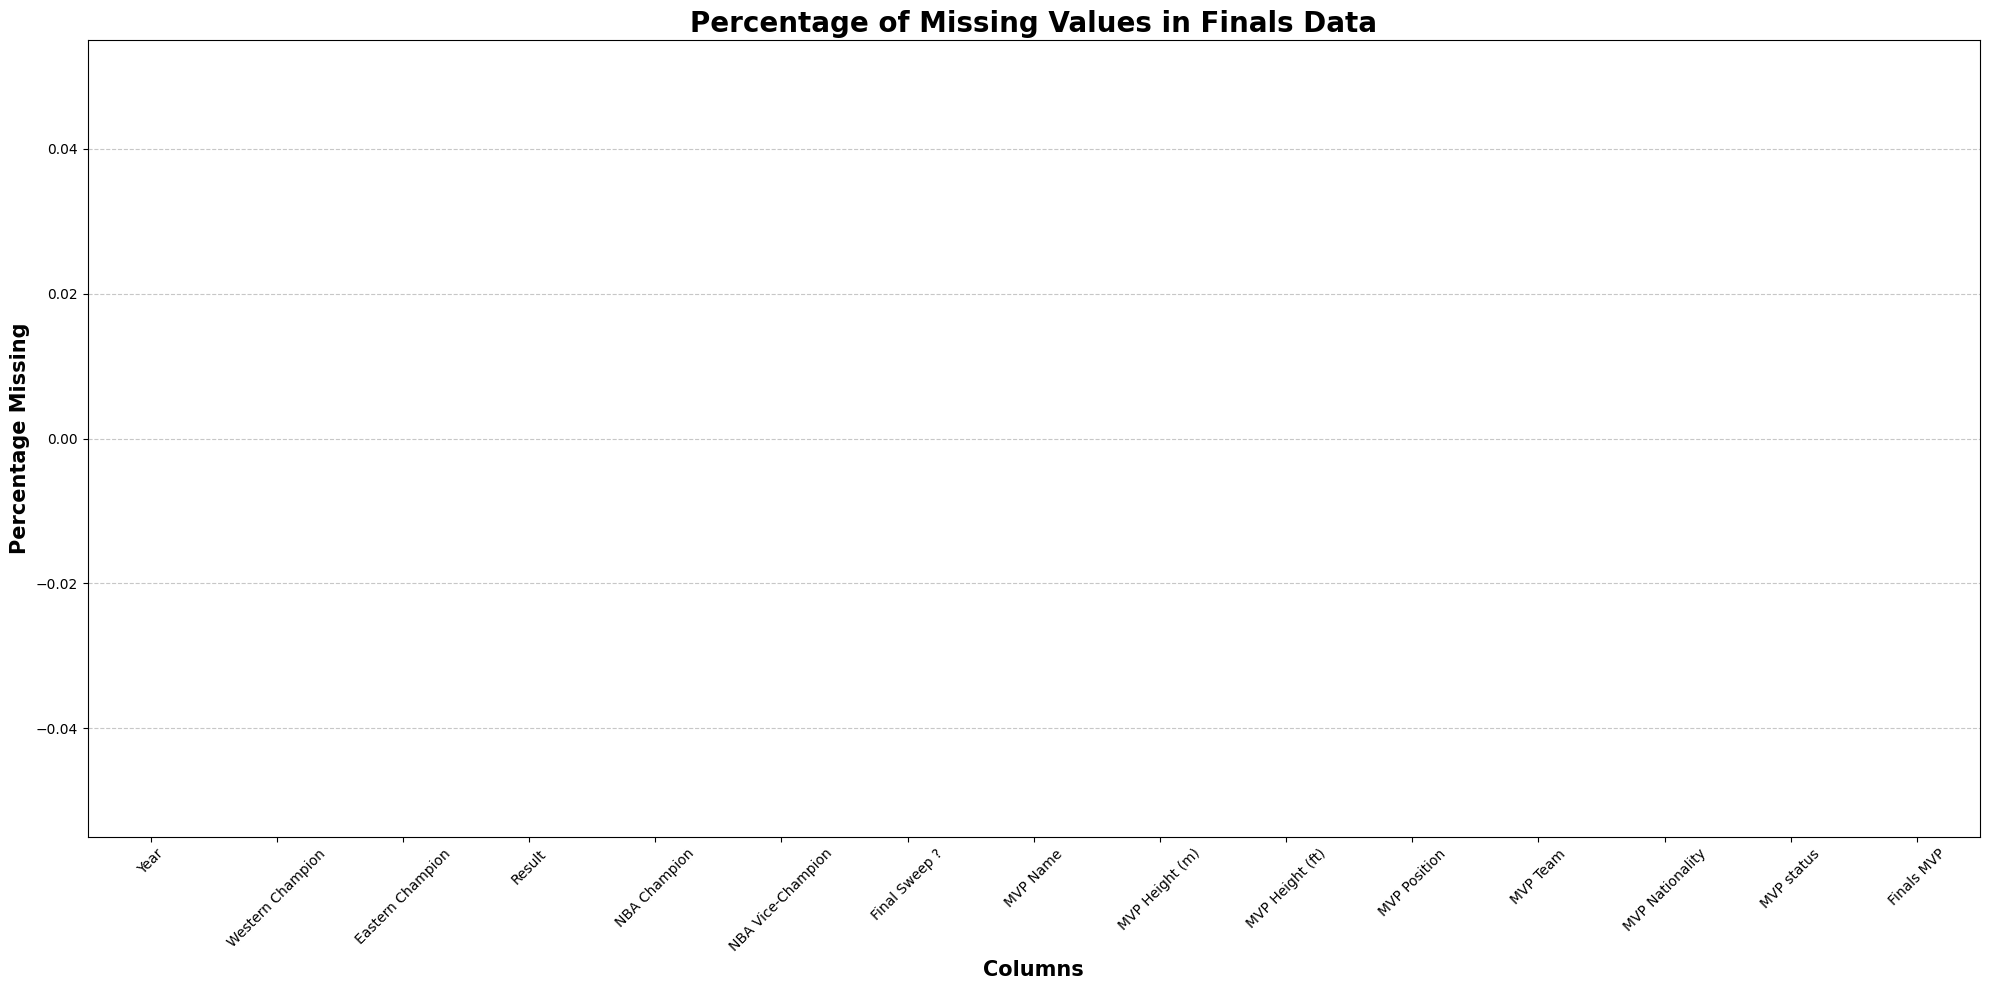

In [26]:
plt.figure(figsize=(20, 10)) 
plot = finalsStats.isna().mean().plot(kind='bar')
plot.set_title('Percentage of Missing Values in Finals Data', fontweight='bold', fontsize=20)
plot.set_xlabel('Columns', fontweight='bold', fontsize=15)
plot.set_ylabel('Percentage Missing', fontweight='bold', fontsize=15)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [15]:
finalsStats

,index,Year,Western Champion,Eastern Champion,Result,NBA Champion,NBA Vice-Champion,Final Sweep ?,MVP Name,MVP Height (m),MVP Height (ft),MVP Position,MVP Team,MVP Nationality,MVP status,Finals MVP
6,6,1956,Fort Wayne Pistons,Philadelphia Warriors,1–4,Philadelphia Warriors,Fort Wayne Pistons,False,B. Pettit,2.06,6.758530,Forward,Saint Louis Hawks,US,Not reached Final,Bob Pettit
7,7,1957,St. Louis Hawks,Boston Celtics,3–4,Boston Celtics,St. Louis Hawks,False,B. Cousy,1.85,6.069554,Guard,Boston Celtics,US,Champion,Bob Cousy
8,8,1958,St. Louis Hawks,Boston Celtics,4–2,St. Louis Hawks,Boston Celtics,False,B. Russell,2.08,6.824147,Center,Boston Celtics,US,Vice-Champion,Bill Russell
9,9,1959,Minneapolis Lakers,Boston Celtics,0–4,Boston Celtics,Minneapolis Lakers,True,B. Pettit,2.06,6.758530,Forward,Saint Louis Hawks,US,Not reached Final,Elgin Baylor
10,10,1960,St. Louis Hawks,Boston Celtics,3–4,Boston Celtics,St. Louis Hawks,False,W. Chamberlain,2.16,7.086614,Center,Philadelphia Warriors,US,Not reached Final,Bill Russell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,68,2019,Golden State Warriors,Toronto Raptors,4–2,Toronto Raptors,Golden State Warriors,False,Giannis Antetokounmpo,2.11,6.916700,Forward,Milwaukee Bucks,Greece,Not reached Final,Kawhi Leonard
70,69,2020,Los Angeles Lakers,Miami Heat,4–2,Los Angeles Lakers,Miami Heat,False,Giannis Antetokounmpo,2.11,6.916700,Forward,Milwaukee Bucks,Greece,Not reached Final,LeBron James
71,70,2021,Phoenix Suns,Milwaukee Bucks,4–2,Milwaukee Bucks,Phoenix Suns,False,Nikola Jokic,2.11,6.916600,Center,Denver Nuggets,Serbia,Not reached Final,Giannis Antetokounmpo
72,71,2022,Golden State Warriors,Boston Celtics,4–2,Golden State Warriors,Boston Celtics,False,Nikola Jokic,2.11,6.916600,Center,Denver Nuggets,Serbia,Not reached Final,Stephen Curry


The index column starts at 6 as we can see, due to the fact that we dropped 6 rows. Let's remove the index column to make reading the dataframe easier

In [18]:
finalsStats.drop('index', axis=1, inplace=True)



In [19]:
finalsStats

,Year,Western Champion,Eastern Champion,Result,NBA Champion,NBA Vice-Champion,Final Sweep ?,MVP Name,MVP Height (m),MVP Height (ft),MVP Position,MVP Team,MVP Nationality,MVP status,Finals MVP
0,1956,Fort Wayne Pistons,Philadelphia Warriors,1–4,Philadelphia Warriors,Fort Wayne Pistons,False,B. Pettit,2.06,6.758530,Forward,Saint Louis Hawks,US,Not reached Final,Bob Pettit
1,1957,St. Louis Hawks,Boston Celtics,3–4,Boston Celtics,St. Louis Hawks,False,B. Cousy,1.85,6.069554,Guard,Boston Celtics,US,Champion,Bob Cousy
2,1958,St. Louis Hawks,Boston Celtics,4–2,St. Louis Hawks,Boston Celtics,False,B. Russell,2.08,6.824147,Center,Boston Celtics,US,Vice-Champion,Bill Russell
3,1959,Minneapolis Lakers,Boston Celtics,0–4,Boston Celtics,Minneapolis Lakers,True,B. Pettit,2.06,6.758530,Forward,Saint Louis Hawks,US,Not reached Final,Elgin Baylor
4,1960,St. Louis Hawks,Boston Celtics,3–4,Boston Celtics,St. Louis Hawks,False,W. Chamberlain,2.16,7.086614,Center,Philadelphia Warriors,US,Not reached Final,Bill Russell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,2019,Golden State Warriors,Toronto Raptors,4–2,Toronto Raptors,Golden State Warriors,False,Giannis Antetokounmpo,2.11,6.916700,Forward,Milwaukee Bucks,Greece,Not reached Final,Kawhi Leonard
64,2020,Los Angeles Lakers,Miami Heat,4–2,Los Angeles Lakers,Miami Heat,False,Giannis Antetokounmpo,2.11,6.916700,Forward,Milwaukee Bucks,Greece,Not reached Final,LeBron James
65,2021,Phoenix Suns,Milwaukee Bucks,4–2,Milwaukee Bucks,Phoenix Suns,False,Nikola Jokic,2.11,6.916600,Center,Denver Nuggets,Serbia,Not reached Final,Giannis Antetokounmpo
66,2022,Golden State Warriors,Boston Celtics,4–2,Golden State Warriors,Boston Celtics,False,Nikola Jokic,2.11,6.916600,Center,Denver Nuggets,Serbia,Not reached Final,Stephen Curry


Let's further inspect the dataset and clean it:

In [21]:
finalsStats.columns

Index(['Year', 'Western Champion', 'Eastern Champion', 'Result',
       'NBA Champion', 'NBA Vice-Champion', 'Final Sweep ?', 'MVP Name',
       'MVP Height (m)', 'MVP Height (ft)', 'MVP Position', 'MVP Team',
       'MVP Nationality', 'MVP status', 'Finals MVP'],
      dtype='object')

Above are the columns for the dataset, it's important to know what data and what type of values we are dealing with. Let's look at the amount of rows and columns in the dataframe:

In [22]:
print("Number of rows:", finalsStats.shape[0])
print("Number of columns:", finalsStats.shape[1])


Number of rows: 68
Number of columns: 15


In [23]:
finalsStats.dtypes

Year                   int64
Western Champion      object
Eastern Champion      object
Result                object
NBA Champion          object
NBA Vice-Champion     object
Final Sweep ?           bool
MVP Name              object
MVP Height (m)       float64
MVP Height (ft)      float64
MVP Position          object
MVP Team              object
MVP Nationality       object
MVP status            object
Finals MVP            object
dtype: object

In [27]:
duplicates = finalsStats.duplicated()
print("There are %d duplicate rows in the dataset" % duplicates.sum())

There are 0 duplicate rows in the dataset


The dataset seems to be clean and ready to go for analysis. We need to just export the cleaned dataset to a csv file in our cleaned data directory

In [28]:
output_dir = os.path.join("..", "data", "cleaned", "finals_data")
os.makedirs(output_dir, exist_ok=True)

output_filename = os.path.join(output_dir, "finals_data_cleaned.csv")
finalsStats.to_csv(output_filename, index=False)